In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

In [3]:
movies= pd.read_csv('/content/my_movies.csv')
movies

V1             V2             V3  ... LOTR Braveheart  Green Mile
0    Sixth Sense          LOTR1  Harry Potter1  ...    0          0           1
1      Gladiator        Patriot     Braveheart  ...    0          1           0
2          LOTR1          LOTR2            NaN  ...    0          0           0
3      Gladiator        Patriot    Sixth Sense  ...    0          0           0
4      Gladiator        Patriot    Sixth Sense  ...    0          0           0
5      Gladiator        Patriot    Sixth Sense  ...    0          0           0
6  Harry Potter1  Harry Potter2            NaN  ...    0          0           0
7      Gladiator        Patriot            NaN  ...    0          0           0
8      Gladiator        Patriot    Sixth Sense  ...    0          0           0
9    Sixth Sense           LOTR      Gladiator  ...    1          0           1

[10 rows x 15 columns]

In [6]:
movies_1=movies.drop(['V1','V2','V3','V4','V5'],axis= 1)

In [7]:
movies_1.head()

Sixth Sense  Gladiator  LOTR1  ...  LOTR  Braveheart  Green Mile
0            1          0      1  ...     0           0           1
1            0          1      0  ...     0           1           0
2            0          0      1  ...     0           0           0
3            1          1      0  ...     0           0           0
4            1          1      0  ...     0           0           0

[5 rows x 10 columns]

# Apriori algorithm

In [8]:
frequent_itemsets = apriori(movies_1, min_support=0.1, use_colnames=True)
frequent_itemsets

support                                           itemsets
0       0.6                                      (Sixth Sense)
1       0.7                                        (Gladiator)
2       0.2                                            (LOTR1)
3       0.2                                    (Harry Potter1)
4       0.6                                          (Patriot)
5       0.2                                            (LOTR2)
6       0.1                                    (Harry Potter2)
7       0.1                                             (LOTR)
8       0.1                                       (Braveheart)
9       0.2                                       (Green Mile)
10      0.5                           (Gladiator, Sixth Sense)
11      0.1                               (LOTR1, Sixth Sense)
12      0.1                       (Harry Potter1, Sixth Sense)
13      0.4                             (Sixth Sense, Patriot)
14      0.1                               (LOTR2, Sixth Sense)
15      0.1                                (LOTR, Sixth Sense)
16      0.2                          (Sixth Sense, Green Mile)
17      0.6                               (Gladiator, Patriot)
18      0.1                                  (Gladiator, LOTR)
19      0.1                            (Gladiator, Braveheart)
20      0.1                            (Gladiator, Green Mile)
21      0.1                             (Harry Potter1, LOTR1)
22      0.2                                     (LOTR1, LOTR2)
23      0.1                                (LOTR1, Green Mile)
24      0.1                             (Harry Potter1, LOTR2)
25      0.1                     (Harry Potter1, Harry Potter2)
26      0.1                        (Harry Potter1, Green Mile)
27      0.1                              (Braveheart, Patriot)
28      0.1                                (LOTR2, Green Mile)
29      0.1                                 (LOTR, Green Mile)
30      0.4                  (Gladiator, Sixth Sense, Patriot)
31      0.1                     (Gladiator, Sixth Sense, LOTR)
32      0.1               (Gladiator, Sixth Sense, Green Mile)
33      0.1                (Harry Potter1, LOTR1, Sixth Sense)
34      0.1                        (LOTR2, LOTR1, Sixth Sense)
35      0.1                   (LOTR1, Sixth Sense, Green Mile)
36      0.1                (Harry Potter1, LOTR2, Sixth Sense)
37      0.1           (Harry Potter1, Sixth Sense, Green Mile)
38      0.1                   (LOTR2, Sixth Sense, Green Mile)
39      0.1                    (LOTR, Sixth Sense, Green Mile)
40      0.1                   (Gladiator, Braveheart, Patriot)
41      0.1                      (LOTR, Gladiator, Green Mile)
42      0.1                      (Harry Potter1, LOTR1, LOTR2)
43      0.1                 (Harry Potter1, LOTR1, Green Mile)
44      0.1                         (LOTR1, LOTR2, Green Mile)
45      0.1                 (Harry Potter1, LOTR2, Green Mile)
46      0.1         (LOTR, Gladiator, Sixth Sense, Green Mile)
47      0.1         (Harry Potter1, LOTR2, LOTR1, Sixth Sense)
48      0.1    (Harry Potter1, LOTR1, Sixth Sense, Green Mile)
49      0.1            (LOTR2, LOTR1, Sixth Sense, Green Mile)
50      0.1    (Harry Potter1, LOTR2, Sixth Sense, Green Mile)
51      0.1          (Harry Potter1, LOTR1, LOTR2, Green Mile)
52      0.1  (LOTR1, Green Mile, Harry Potter1, Sixth Sense...

In [11]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

antecedents  ... conviction
0        (Gladiator)  ...       1.40
1      (Sixth Sense)  ...       1.80
2      (Sixth Sense)  ...       1.20
3          (Patriot)  ...       1.20
4             (LOTR)  ...        inf
..               ...  ...        ...
233          (LOTR1)  ...       1.80
234     (Green Mile)  ...       1.80
235  (Harry Potter1)  ...       1.80
236    (Sixth Sense)  ...       1.08
237          (LOTR2)  ...       1.80

[238 rows x 9 columns]

In [12]:
rules.sort_values('lift',ascending = False)[0:20] # to check top 20 rules

antecedents  ... conviction
202                   (LOTR1, Green Mile)  ...        inf
188                   (LOTR2, Green Mile)  ...        inf
127  (Gladiator, Sixth Sense, Green Mile)  ...        inf
129                   (LOTR, Sixth Sense)  ...        inf
203                   (LOTR2, Green Mile)  ...        inf
160                   (LOTR1, Green Mile)  ...        inf
132               (Gladiator, Green Mile)  ...        inf
199                (Harry Potter1, LOTR2)  ...        inf
198                (Harry Potter1, LOTR1)  ...        inf
134                                (LOTR)  ...        inf
142                (Harry Potter1, LOTR2)  ...        inf
143                (Harry Potter1, LOTR1)  ...        inf
187                  (Sixth Sense, LOTR2)  ...        inf
97                                 (LOTR)  ...        inf
186           (Harry Potter1, Green Mile)  ...        inf
185          (Harry Potter1, Sixth Sense)  ...        inf
146                  (Sixth Sense, LOTR2)  ...        inf
147                  (LOTR1, Sixth Sense)  ...        inf
174                   (LOTR1, Green Mile)  ...        inf
173                  (LOTR1, Sixth Sense)  ...        inf

[20 rows x 9 columns]

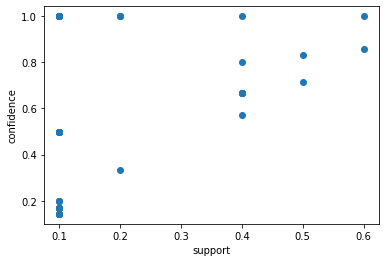

In [13]:
plt.scatter(rules.support,rules.confidence) #plotting support and confidence
plt.ylabel('confidence')
plt.xlabel('support')
plt.show()

Changing apriori algorithm

In [19]:
frequent_itemsets_1 = apriori(movies_1, min_support=0.09, use_colnames=True)
frequent_itemsets_1

support                                           itemsets
0       0.6                                      (Sixth Sense)
1       0.7                                        (Gladiator)
2       0.2                                            (LOTR1)
3       0.2                                    (Harry Potter1)
4       0.6                                          (Patriot)
5       0.2                                            (LOTR2)
6       0.1                                    (Harry Potter2)
7       0.1                                             (LOTR)
8       0.1                                       (Braveheart)
9       0.2                                       (Green Mile)
10      0.5                           (Gladiator, Sixth Sense)
11      0.1                               (LOTR1, Sixth Sense)
12      0.1                       (Harry Potter1, Sixth Sense)
13      0.4                             (Sixth Sense, Patriot)
14      0.1                               (LOTR2, Sixth Sense)
15      0.1                                (LOTR, Sixth Sense)
16      0.2                          (Sixth Sense, Green Mile)
17      0.6                               (Gladiator, Patriot)
18      0.1                                  (Gladiator, LOTR)
19      0.1                            (Gladiator, Braveheart)
20      0.1                            (Gladiator, Green Mile)
21      0.1                             (Harry Potter1, LOTR1)
22      0.2                                     (LOTR1, LOTR2)
23      0.1                                (LOTR1, Green Mile)
24      0.1                             (Harry Potter1, LOTR2)
25      0.1                     (Harry Potter1, Harry Potter2)
26      0.1                        (Harry Potter1, Green Mile)
27      0.1                              (Braveheart, Patriot)
28      0.1                                (LOTR2, Green Mile)
29      0.1                                 (LOTR, Green Mile)
30      0.4                  (Gladiator, Sixth Sense, Patriot)
31      0.1                     (Gladiator, Sixth Sense, LOTR)
32      0.1               (Gladiator, Sixth Sense, Green Mile)
33      0.1                (Harry Potter1, LOTR1, Sixth Sense)
34      0.1                        (LOTR2, LOTR1, Sixth Sense)
35      0.1                   (LOTR1, Sixth Sense, Green Mile)
36      0.1                (Harry Potter1, LOTR2, Sixth Sense)
37      0.1           (Harry Potter1, Sixth Sense, Green Mile)
38      0.1                   (LOTR2, Sixth Sense, Green Mile)
39      0.1                    (LOTR, Sixth Sense, Green Mile)
40      0.1                   (Gladiator, Braveheart, Patriot)
41      0.1                      (LOTR, Gladiator, Green Mile)
42      0.1                      (Harry Potter1, LOTR1, LOTR2)
43      0.1                 (Harry Potter1, LOTR1, Green Mile)
44      0.1                         (LOTR1, LOTR2, Green Mile)
45      0.1                 (Harry Potter1, LOTR2, Green Mile)
46      0.1         (LOTR, Gladiator, Sixth Sense, Green Mile)
47      0.1         (Harry Potter1, LOTR2, LOTR1, Sixth Sense)
48      0.1    (Harry Potter1, LOTR1, Sixth Sense, Green Mile)
49      0.1            (LOTR2, LOTR1, Sixth Sense, Green Mile)
50      0.1    (Harry Potter1, LOTR2, Sixth Sense, Green Mile)
51      0.1          (Harry Potter1, LOTR1, LOTR2, Green Mile)
52      0.1  (LOTR1, Green Mile, Harry Potter1, Sixth Sense...

In [20]:
rules_1 = association_rules(frequent_itemsets_1, metric="lift", min_threshold= 1) # changing threshold value to 1, to get better lift ratio
rules_1

antecedents  ... conviction
0        (Gladiator)  ...       1.40
1      (Sixth Sense)  ...       1.80
2      (Sixth Sense)  ...       1.20
3          (Patriot)  ...       1.20
4             (LOTR)  ...        inf
..               ...  ...        ...
233          (LOTR1)  ...       1.80
234     (Green Mile)  ...       1.80
235  (Harry Potter1)  ...       1.80
236    (Sixth Sense)  ...       1.08
237          (LOTR2)  ...       1.80

[238 rows x 9 columns]

In [21]:
rules_1.sort_values('lift',ascending = False)[0:20] # to check top 20 rules

antecedents  ... conviction
202                   (LOTR1, Green Mile)  ...        inf
188                   (LOTR2, Green Mile)  ...        inf
127  (Gladiator, Sixth Sense, Green Mile)  ...        inf
129                   (LOTR, Sixth Sense)  ...        inf
203                   (LOTR2, Green Mile)  ...        inf
160                   (LOTR1, Green Mile)  ...        inf
132               (Gladiator, Green Mile)  ...        inf
199                (Harry Potter1, LOTR2)  ...        inf
198                (Harry Potter1, LOTR1)  ...        inf
134                                (LOTR)  ...        inf
142                (Harry Potter1, LOTR2)  ...        inf
143                (Harry Potter1, LOTR1)  ...        inf
187                  (Sixth Sense, LOTR2)  ...        inf
97                                 (LOTR)  ...        inf
186           (Harry Potter1, Green Mile)  ...        inf
185          (Harry Potter1, Sixth Sense)  ...        inf
146                  (Sixth Sense, LOTR2)  ...        inf
147                  (LOTR1, Sixth Sense)  ...        inf
174                   (LOTR1, Green Mile)  ...        inf
173                  (LOTR1, Sixth Sense)  ...        inf

[20 rows x 9 columns]

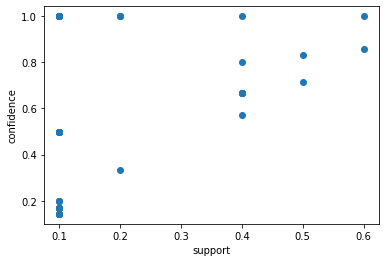

In [22]:
plt.scatter(rules_1.support,rules_1.confidence) #plotting support and confidence
plt.ylabel('confidence')
plt.xlabel('support')
plt.show()